# **AI期中考題**
# (A)	 下載 csv檔案到電腦並解說資料的特性與分的類別

# 特徵 :
clump_thickness、uniformity_of_cell_size、uniformity_of_cell_shape、marginal_adhesion、single_epithelial_cell_size、bare_nuclei、bland_chromatin、normal_nucleoli、mitosis
# 類別 : 
2代表良性 、 4代表惡性


# (B)	請在 google colab 新開一個記事本, 並參考執行網站之記事本執行開啟新記事本後, 請用print印出  班級, 姓名, 學號, 日期




In [1]:
import datetime
name = ""
S_class = ""
number = ""
today = datetime.datetime.today()

#print("名字:%s,班級:%s,學號:%s,今天是:%s/%s"%(name,S_class,number,today.month,today.day))

# (C)	請執行上傳檔案程式碼, 將下載檔案上傳到你的雲端技術本環境

In [2]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

# Import module
 



In [3]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from __future__ import absolute_import,division,print_function,unicode_literals

# 確認版本

In [4]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.0
Eager execution: True


# Import dataset

In [5]:
'''
train_dataset_url = "/content/breast_cancer_dataset.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),origin=train_dataset_url)
'''

train_dataset_fp = '/content/drive/MyDrive/breast_cancer_dataset.csv'
print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /content/drive/MyDrive/breast_cancer_dataset.csv


# Check data

In [6]:
!head -n5 {train_dataset_fp}  #檢查前五個

clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0


In [7]:
column_names = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitosis','class']
#取得特徵和標籤名
feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))


Features: ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis']
Label: class


In [8]:
class_names = ['2', '4']  #2為良性，4為惡性

In [9]:
len(set(column_names))

10

# 建立TensorFlow.data.Dataset

In [10]:
batch_size=32
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    label_name=label_name,
    column_names=column_names,
    #na_value="?",
    num_epochs=1
)

In [11]:
features, labels = next(iter(train_dataset))
print(features)

OrderedDict([('clump_thickness', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([10,  7,  6,  6,  1,  5,  8,  3,  2,  4,  1,  1,  5,  1,  1, 10,  1,
        3,  3,  5, 10,  1,  3,  3,  3,  3, 10,  1,  2,  5,  1,  1],
      dtype=int32)>), ('uniformity_of_cell_size', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([ 4,  9,  1, 10,  1,  1, 10, 10,  1,  2,  1,  1,  1,  1,  1,  4,  1,
        1,  1,  2, 10,  1,  3,  1,  1,  2, 10,  1,  3,  1,  1,  1],
      dtype=int32)>), ('uniformity_of_cell_shape', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([ 3,  4,  3, 10,  1,  1, 10,  3,  1,  1,  1,  1,  1,  3,  1,  4,  1,
        1,  1,  2, 10,  1,  5,  1,  1,  1, 10,  1,  1,  1,  1,  1],
      dtype=int32)>), ('marginal_adhesion', <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([10, 10,  1,  2,  1,  1,  8, 10,  2,  1,  1,  1,  1,  1,  1, 10,  1,
        1,  1,  2, 10,  1,  2,  1,  3,  1,  1,  1,  1,  1,  1,  1],
      dtype=int32)>), ('single_epithelial_cell_size', <tf.Tensor: shap

**可視化圖**

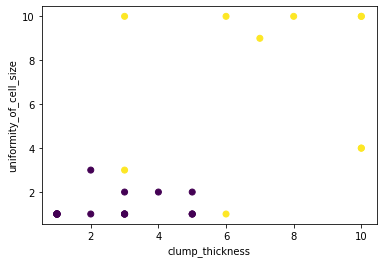

In [12]:
plt.scatter(features['clump_thickness'],
            features['uniformity_of_cell_size'],
            c=labels,                  #
            cmap='viridis')

plt.xlabel("clump_thickness")
plt.ylabel("uniformity_of_cell_size")
plt.show()

**使用tf.pack()來將features重構爲(batch_size, num_features)形狀。**

In [13]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)  #axis = 1 將矩陣第一項組合再一起Print在同一個矩陣
    return features, labels

In [14]:
# 使用tf.data.Dataset.map將重構函數運用到每條數據中。
train_dataset = train_dataset.map(pack_features_vector)
# 查看前5個數據
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[      1       1       1       1       1 -100000       2       1       1]
 [      8       4      10       5       4       4       7      10       1]
 [      1       1       1       1       2       1       3       1       1]
 [      2       1       1       1       2       1       3       1       1]
 [      5       3       3       3       2       3       4       4       1]], shape=(5, 9), dtype=int32)


# 使用Keras創建模型

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(25, activation='relu', input_shape=(9,)),  #input_shape()裡的數值為特徵總數不包含類別
    tf.keras.layers.Dense(25, activation='relu'),           # output neurons = 10 如果output neurons數值小於feature，則會影響歸一化時的數值
    tf.keras.layers.Dense(2)
])



# 測試Model結構

In [16]:
prediction = model(features)
prediction[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 1.4473004e+04,  1.7928326e+04],
       [ 4.7735558e+00,  5.9345126e-02],
       [ 5.8352149e-01, -2.4157658e-01],
       [ 7.1282744e-01, -1.0998332e-01],
       [ 2.0455670e+00, -3.0808997e-01]], dtype=float32)>

# 歸一化
softmax()會將所有的數值範圍落在0~1

In [17]:
tf.nn.softmax(prediction)[:5]  

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.        , 1.        ],
       [0.99111277, 0.00888725],
       [0.69531745, 0.30468258],
       [0.6948327 , 0.30516735],
       [0.91322446, 0.08677553]], dtype=float32)>

使用Tf.argmax獲得概率最大的類標籤

In [18]:
print('prediction:', tf.argmax(prediction, axis=1))
print('label:', labels)

prediction: tf.Tensor([1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(32,), dtype=int64)
label: tf.Tensor([0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1], shape=(32,), dtype=int32)


# **Model Training**
Loss function

In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [20]:
def loss(model, x, y):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 110.4603500366211


# 使用tf.GradientTape計算loss對所有變量的梯度。

In [21]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

# 創建優化器

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

使用優化器

In [23]:
loss_value, grads = grad(model, features, labels )
print('步數：{}, 初始loss值：{}'.format(optimizer.iterations.numpy(),loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print('步數：{}, loss值：{}'.format(optimizer.iterations.numpy(),loss(model,features, labels).numpy()))

步數：0, 初始loss值：110.4603500366211
步數：1, loss值：1.6278109550476074


Training loop

In [24]:
# 保存loss和acc
train_loss_results=[]
train_accuracy_results=[]

num_epochs =201
for epoch in range(num_epochs):
    # 用於記錄loss和acc的類
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # 訓練循環
    for x, y in train_dataset:
        # 獲取loss和梯度
        loss_value, grads = grad(model, x, y)
        # 梯度優化
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # 記錄loss均值
        epoch_loss_avg(loss_value)
        # 記錄準確率
        epoch_accuracy(y, model(x))

    # 保存每個epoch的loss和acc
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,epoch_loss_avg.result(),epoch_accuracy.result()))


Epoch 000: Loss: 270.498, Accuracy: 61.863%
Epoch 050: Loss: 0.062, Accuracy: 97.891%
Epoch 100: Loss: 0.046, Accuracy: 98.418%
Epoch 150: Loss: 0.047, Accuracy: 98.594%
Epoch 200: Loss: 0.030, Accuracy: 99.473%


訓練過程可視化

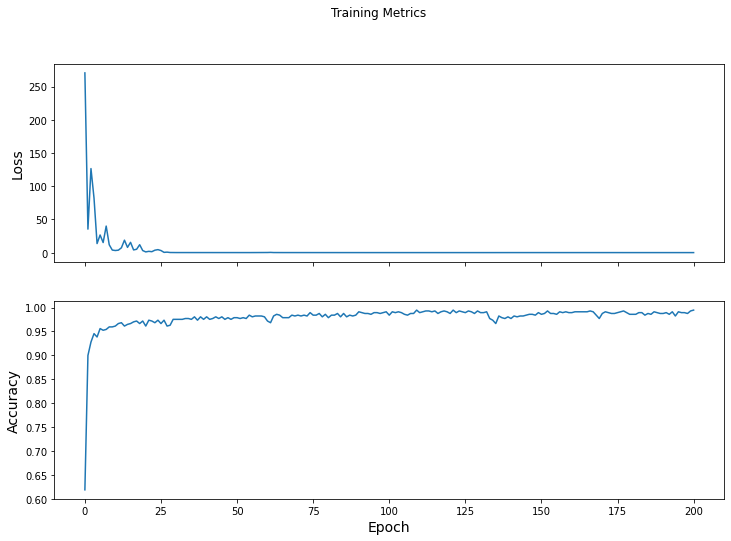

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

# 使用訓練好的模型進行預測

In [26]:
predict_dataset = tf.convert_to_tensor([
    [5,1,1,1,2,1,3,1,1],
    [5,4,4,5,7,10,3,2,1],
    [3,1,1,1,2,2,3,1,1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: 2 (100.0%)
Example 1 prediction: 2 (98.1%)
Example 2 prediction: 2 (100.0%)
